In [3]:
import cv2
import numpy as np

from scipy import stats
from scipy import fftpack

from skimage.io import imshow

from matplotlib import pyplot as plt

In [4]:
im = cv2.imread("/home/egor/Downloads/Image__2024-02-27__10-31-46.bmp")

pr1 = cv2.cvtColor(cv2.imread("/home/egor/Downloads/pr1.png"), cv2.COLOR_RGB2GRAY)
mr1 = cv2.cvtColor(cv2.imread("/home/egor/Downloads/mr1.png"), cv2.COLOR_RGB2GRAY)
mr2 = cv2.cvtColor(cv2.imread("/home/egor/Downloads/mr2.png"), cv2.COLOR_RGB2GRAY)

pc1 = cv2.cvtColor(cv2.imread("/home/egor/Downloads/pc1.png"), cv2.COLOR_RGB2GRAY)
pc2 = cv2.cvtColor(cv2.imread("/home/egor/Downloads/pc2.png"), cv2.COLOR_RGB2GRAY)
mc1 = cv2.cvtColor(cv2.imread("/home/egor/Downloads/mc1.png"), cv2.COLOR_RGB2GRAY)

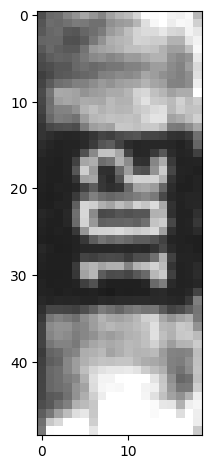

In [3]:
imshow(pr1)

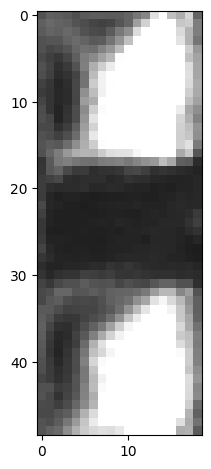

In [4]:
imshow(mr1)

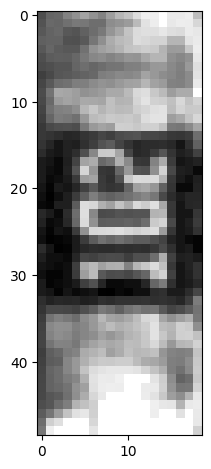

In [17]:
im = cv2.equalizeHist(pr1)
imshow(im)

/tmp/ipykernel_50993/3852073061.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ((i + 1) * bin_w, h - int(np.round(hist[i] * h / 255.0))),


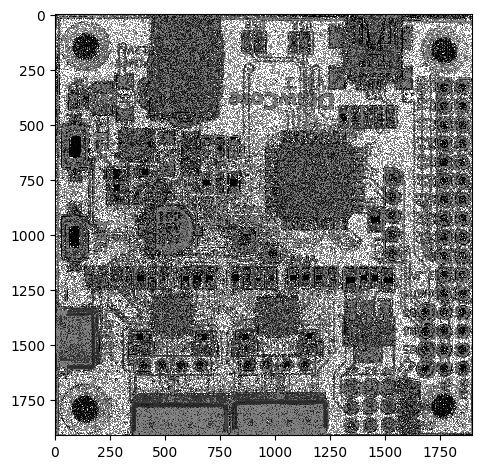

In [10]:
import cv2 as cv
import numpy as np


def Hist_and_Backproj(val):
    bins = val
    histSize = max(bins, 2)
    ranges = [0, 180]  # hue_range

    hist = cv.calcHist([hue], [0], None, [histSize], ranges, accumulate=False)
    cv.normalize(hist, hist, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

    backproj = cv.calcBackProject([hue], [0], hist, ranges, scale=1)

    w = 400
    h = 400
    bin_w = int(round(w / histSize))
    histImg = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(bins):
        cv.rectangle(
            histImg,
            (i * bin_w, h),
            ((i + 1) * bin_w, h - int(np.round(hist[i] * h / 255.0))),
            (0, 0, 255),
            cv.FILLED,
        )

    return histImg, backproj


hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
ch = (0, 0)
hue = np.empty(hsv.shape, hsv.dtype)
cv.mixChannels([hsv], [hue], ch)
bins = 100
histImg, backproj = Hist_and_Backproj(bins)

imshow(backproj)

-0.005391861650378299
838.9203652217557


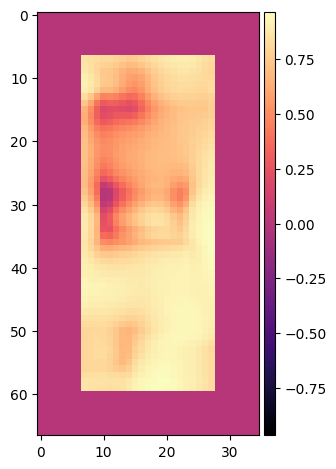

In [52]:
def ncc(im1: np.ndarray, im2: np.ndarray, w=3):
    assert im1.shape[0] == im2.shape[0]
    assert im1.shape[1] == im2.shape[1]

    assert w % 2 != 0
    assert im1.shape[0] >= w
    assert im1.shape[1] >= w

    offset = int(w / 2)

    cor = np.zeros(im1.shape)
    for i in range(0 + offset, im1.shape[0] - offset):
        for j in range(0 + offset, im1.shape[1] - offset):
            s1 = im1[i - offset : i + offset + 1, j - offset : j + offset + 1]
            s2 = im2[i - offset : i + offset + 1, j - offset : j + offset + 1]

            cor[i, j] = _ncc1(s1, s2)

    return cor


im0 = cv2.medianBlur(im_3, 9)
im1 = cv2.medianBlur(im_1, 9)

cor = ncc(im0, im1, w=15)
imshow(cor, cmap="magma")

print(cor.min())
print(cor.sum())

-0.2193080560799825
725.9726488131834


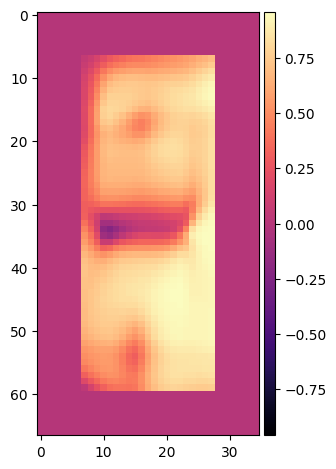

In [51]:
im0 = cv2.medianBlur(im_0, 9)
im1 = cv2.medianBlur(im_1, 9)

cor = ncc(im0, im1, w=15)
imshow(cor, cmap="magma")

print(cor.min())
print(cor.sum())

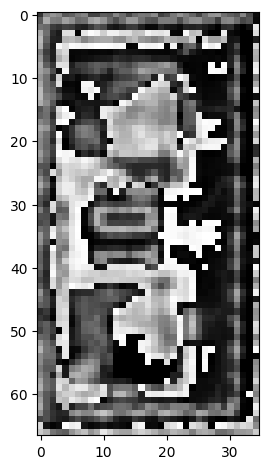

In [159]:
plt.close("all")
fig, ax = plt.subplots()

y_0 = np.apply_along_axis(np.sum, 1, im_0)
y_1 = np.apply_along_axis(np.sum, 1, im_1)
x = np.arange(0, len(y_0))

# ax.plot(x, y_0)
# ax.plot(x, y_1)
imshow(im_1 - im_0)

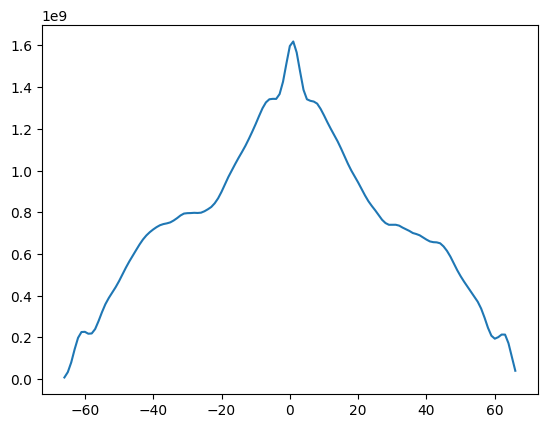

In [86]:
plt.close("all")
fig, ax = plt.subplots()

y = np.correlate(y_0, y_1, "full")
x = np.arange(len(y)) - int(len(y)/2)

ax.plot(x, y)

In [121]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

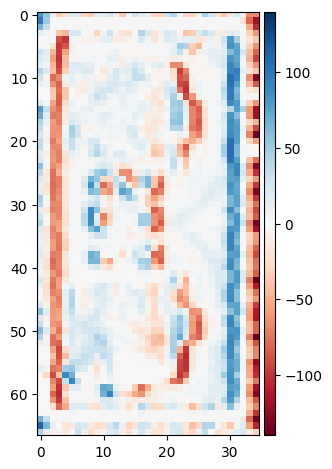

In [152]:
im = im_1

gx, gy = np.gradient(im)
imshow(gy)

In [147]:
e0 = entropy(im_0, disk(5))
e1 = entropy(im_1, disk(5))

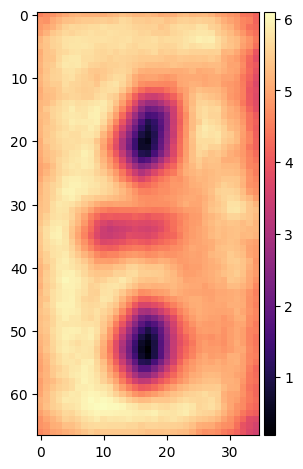

In [150]:
imshow(e0, cmap='magma')

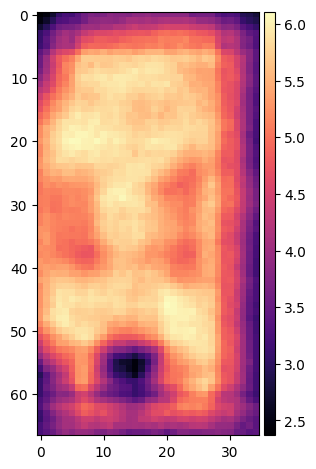

In [149]:
imshow(e1, cmap='magma')

In [ ]:
value, im = cv2.threshold(pc2, 0, 255, cv2.THRESH_OTSU)
imshow(im)

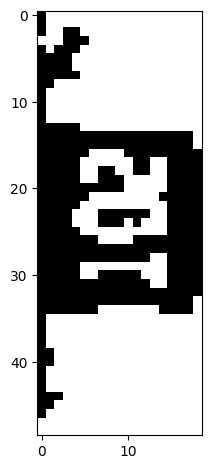

In [67]:
imshow(pr1 > 100)